设置plot配置中文

In [332]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号

从mongoDB读取yushiqi collections中的数据

In [3]:
from pymongo import MongoClient
client = MongoClient()
db = client.get_database("cangpinzongmu")
db.collection_names()
col = db.get_collection("taoci")

统计同一名称各个年代出现的频率name:[era:count,...]

In [84]:
r7 = list(col.aggregate([{"$group":{"_id":{"name":"$rname","era":"$rera"},"count":{"$sum":1}}},
                             {"$group":{"_id":"$_id.name","eras":{"$push":{"era":"$_id.era","count":"$count"}}}}]))
[x for x in r7 if len(x['eras']) <2][:3]

[{'_id': '珊瑚红釉双耳炉', 'eras': [{'count': 1, 'era': '清雍正'}]},
 {'_id': '青花缠枝团花纹盖缸', 'eras': [{'count': 1, 'era': '清康熙'}]},
 {'_id': '青花暗八仙纹碗', 'eras': [{'count': 9, 'era': '清雍正'}]}]

读入数据

In [66]:
o1 = list(col.find())

In [ ]:
o2 = [(x.get("rname",""),x.get("rera","待定")) for x in o1]
print(o2[:10])
import numpy as np
np.random.shuffle(o2)
print(o2[:10])

n1 = [x[0] for x in o2]
l1 = [x[1] for x in o2]

In [333]:
n1 = [x[0] for x in name2era_list]
l1 = [x[1] for x in name2era_list]
print(n1[:10])
print(l1[:10])

['檀香木交龙纽“翊佑传昌”章', '顾囗基致质山札', '福长安画山水吴省兰书御制诗成扇', '品蓝色缎地织金鹊雀登梅纹绦', '锦边十八罗汉-哈剌画像轴', '绿色地天华锦裱片', '近拓宋诗竹碑', '王霖人物扇页', '清人释迦牟尼像轴', '李鱓荷花图轴']
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]]


清洗输入输出

In [334]:
l1 = ["待定" if x=="\x7f其它" else x for x in l1]
l1_set = set(l1)
print(l1_set)
print(len(l1_set))
n1 = [x.replace("\u3000","") for x in n1]

TypeError: unhashable type: 'list'

统计年代分布

In [335]:
c_mp1 = {}
for x in l1:
    c_mp1[x] = c_mp1.get(x,0) + 1
print(len(c_mp1.keys()))
cc = list(c_mp1.items())
cc.sort(key=lambda x: x[1],reverse=True)

from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(range(len(cc)),[x[1] for x in cc],log=True)
plt.xticks(range(len(cc)),[x[0] for x in cc],rotation=60)
plt.show()

TypeError: unhashable type: 'list'

统计输入数据长度分布

弘历行书辛酉秋初至避暑山荘曾诣园一逰不胜云日之感后以分赐果亲王弗复往者廿余年矣兹闻园頺废特甚而王又已背世念此地为皇考旧日所兴息且吾少小问安读书处也不可以有山荘而听其荒落无存仍命奉宸重事修葺复旧观而止策马相视因成三律志怀斗方


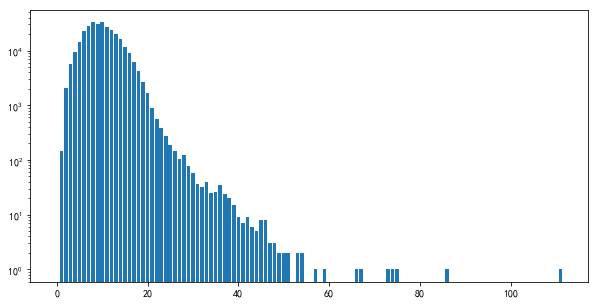

In [336]:
max_n1 = n1[np.argmax([len(x) for x in n1])]
print(max_n1)

lens = [len(x) for x in n1]
from collections import Counter
cc = Counter(lens)
plt.figure(figsize=(10,5))
plt.bar(range(max(cc.keys())+1),[cc.get(i,0) for i in range(max(cc.keys())+1)],log=True)
plt.show()

one-hot输入

In [339]:
len(n1)

302478

In [344]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=7600,char_level=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n、”“')
tokenizer.fit_on_texts(n1)
sequences = tokenizer.texts_to_sequences(n1)
# one_hot_input = tokenizer.texts_to_matrix(n1,mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(one_hot_input.shape)
print(sequences[:3])

tt = list(word_index.items())
tt.sort(key=lambda x : x[1])
print(tt[:100])

Found 7592 unique tokens.
[[193, 146, 62, 668, 16, 252, 11, 2244, 1733, 469, 388, 12, 119], [626, 159, 1192, 77, 915, 32, 35], [114, 92, 288, 51, 32, 37, 235, 976, 144, 6, 105, 112, 36, 127, 53]]
[('纹', 1), ('色', 2), ('花', 3), ('青', 4), ('金', 5), ('书', 6), ('缎', 7), ('册', 8), ('印', 9), ('图', 10), ('“', 11), ('”', 12), ('绣', 13), ('铜', 14), ('玉', 15), ('龙', 16), ('石', 17), ('卷', 18), ('-', 19), ('寿', 20), ('黄', 21), ('彩', 22), ('地', 23), ('字', 24), ('白', 25), ('墨', 26), ('拓', 27), ('款', 28), ('红', 29), ('行', 30), ('云', 31), ('山', 32), ('釉', 33), ('人', 34), ('札', 35), ('诗', 36), ('水', 37), ('钮', 38), ('）', 39), ('（', 40), ('清', 41), ('轴', 42), ('方', 43), ('近', 44), ('十', 45), ('三', 46), ('绸', 47), ('料', 48), ('团', 49), ('面', 50), ('画', 51), ('式', 52), ('扇', 53), ('蓝', 54), ('二', 55), ('暗', 56), ('八', 57), ('文', 58), ('宝', 59), ('像', 60), ('莲', 61), ('木', 62), ('四', 63), ('雕', 64), ('双', 65), ('枝', 66), ('五', 67), ('竹', 68), ('子', 69), ('历', 70), ('王', 71), ('瓶', 72), ('乾', 73), ('万', 74)

padding输入

In [345]:
maxlen = 30
print("maxlen:",maxlen)
import keras
padding_input = keras.preprocessing.sequence.pad_sequences(sequences,maxlen=maxlen)
print(padding_input.shape)
print(padding_input[:10])

maxlen: 30
(302478, 30)
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  193  146   62  668   16  252   11 2244 1733  469  388
    12  119]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  626  159 1192   77  915
    32   35]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  114   92  288   51   32   37  235  976  144    6  105  112   36
   127   53]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  184   54    2    7   23  128    5 1298  559  751  102
     1  116]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  158  130   45   57  229  273   19 2061 4319   51
    60   42]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   81    2   23  140  321  158
   924  101]
 [   0    0    0    0    0    0   

ont_hot输出

In [74]:
import keras
l1_set_list = list(l1_set)
l1_int = [l1_set_list.index(x) for x in l1]
print(l1_int[:10])
ont_hot_l1_int = keras.utils.to_categorical(l1_int)
print(ont_hot_l1_int.shape)
print(ont_hot_l1_int[:3])

[39, 66, 35, 71, 35, 26, 85, 88, 35, 39]
(375434, 103)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.

压缩输出 例如： 清乾隆-->清

{'隋', '唐', '三国', '光绪', '新石器', '六朝', '民国', '商', '秦', '辽', '明', '陏', '雍正', '清', '宋', '现代', '史前', '西夏', '万历', '不定', '金', '战国', '五代', '待定', '元', '近代', '汉', '北朝', '晋', '现当代', '周', '南朝'}
32


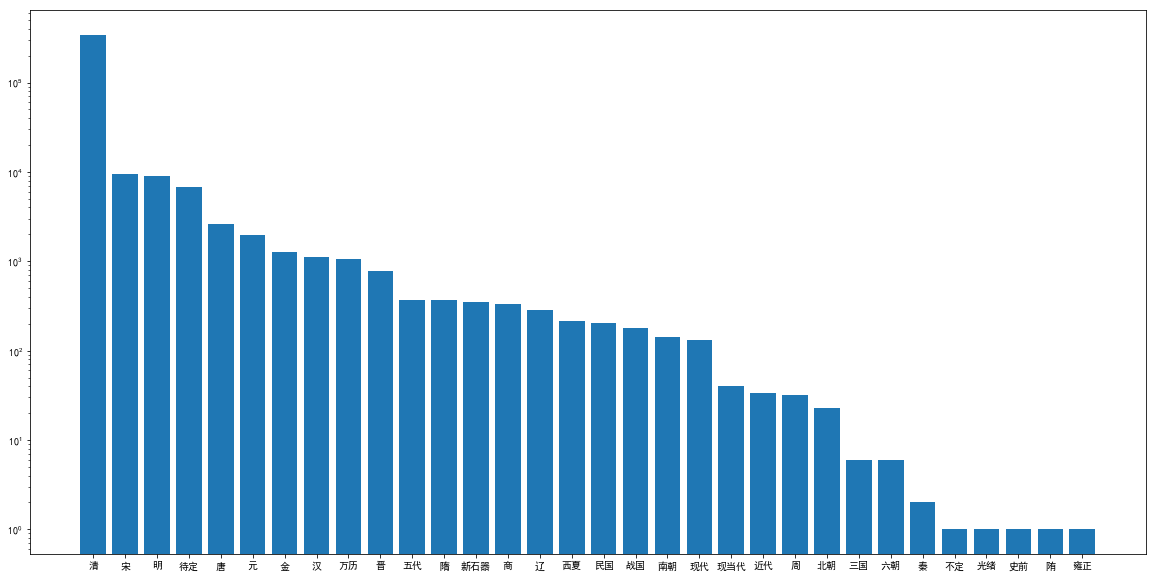

(375434, 32)


In [75]:
import copy
l2 = copy.copy(l1)
# print(len(l2))

l2_set_full = set(l2)
# print(l2_set_full)

kids_era = set()
for x in l2_set_full:
    for y in l2_set_full:
        if y != x:
            if x.startswith(y) or x.endswith(y):
                kids_era.add(x)
                break
                
# print(kids_era)
l2_set = l2_set_full - kids_era
print(l2_set)
print(len(l2_set))

era_map = {}
for x in l2_set_full:
    for y in l2_set:
        if x.startswith(y) or x.endswith(y):
            era_map[x] = y
# print(era_map)

l2 = [era_map[x] for x in l2]

cc = list(Counter(l2).items())

cc.sort(key=lambda x: x[1],reverse=True)
# print(cc)

plt.figure(figsize=(20,10))
plt.bar(range(len(cc)),[x[1] for x in cc],log=True)
plt.xticks(range(len(cc)),[x[0] for x in cc])
plt.show()

l2_set_list = list(l2_set)

l2_int = [l2_set_list.index(x) for x in l2]

# print(l2_int[:100])

one_hot_l2_int = keras.utils.to_categorical(l2_int)
print(one_hot_l2_int.shape)
# print(one_hot_l2_int[:3])

统计随机猜测准确率，作为baseline对照

In [352]:
l1[:3]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [351]:
import copy
def test_baseline(y,epoch):
    shf = copy.copy(y)
    accs = []
    for j in range(epoch):
        np.random.shuffle(shf)
        acc = sum([1 if y[i] == shf[i] else 0 for i in range(len(y))])/len(y)   
        accs.append(acc) 
    print(np.mean(accs))
test_baseline(l1,10)

0.258888249724


计算class weight

In [78]:
l1_w = [c_mp1.get(x, 0) / sum(c_mp1.values()) for x in l1_set]
l1_w = [- np.log(x + 1e-6) / 10 for x in l1_w]
print(l1_w)

[1.2517068651412437, 0.72323347416317396, 0.68738654839026769, 0.6982557237506597, 0.91131506460237355, 1.2517068651412437, 0.75257134125627667, 0.92698203446525496, 1.2517068651412437, 1.2517068651412437, 0.46517774752499941, 1.1619314060442163, 1.2517068651412437, 0.74588229498205605, 0.92419443123999723, 0.76689089559752888, 0.90659447251112746, 0.79277860578664039, 1.1970657811457563, 1.0710535071827934, 0.73453500649169989, 0.99807805995357624, 1.1619314060442163, 1.1359832254202347, 0.49605760019185985, 1.2517068651412437, 0.25985827112417109, 1.2517068651412437, 1.2517068651412437, 1.0597745104973624, 0.24640552636124161, 0.56079028611919246, 1.2517068651412437, 0.71926004573416846, 0.40608485563871249, 0.16233775931841354, 1.2517068651412437, 0.37090558049083266, 0.848716862905605, 0.22512663174270706, 1.1619314060442163, 1.2517068651412437, 0.78773704990412574, 1.2517068651412437, 0.70176100698190103, 0.82572640079148008, 0.52698502809109971, 0.92984957877303498, 0.91376164383

In [79]:
epoches = 50

定义画图函数

In [18]:
def plot_res(hists):
    colors = ['b','r','g','c','y','k','m']
    
    plt.figure(figsize=(20,15))
    i = 0
    for hist_name in hists.keys():
        hist = hists[hist_name]
        epoches = len(hist.history['acc'])
        plt.plot(range(epoches),hist.history['acc'],'%so'%colors[i],label="%s_acc"%hist_name)
        plt.plot(range(epoches),hist.history['val_acc'],"%s"%colors[i],label='%s_val_acc'%hist_name)
        i += 1
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("acc")
    plt.title("acc")
    
    plt.figure(figsize=(20,15))
    i = 0
    for hist_name in hists.keys():
        hist = hists[hist_name]
        epoches = len(hist.history['loss'])
        plt.plot(range(epoches),hist.history['loss'],'%so'%colors[i],label="%s_acc"%hist_name)
        plt.plot(range(epoches),hist.history['val_loss'],"%s"%colors[i],label='%s_val_loss'%hist_name)
        i += 1
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("loss")
    
    plt.show()


构建简单全连接网络

In [81]:
def get_h1_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Dense(256,activation='relu',input_shape=(1700,)))
    model.add(layers.Dense(nb_class,activation='softmax'))
    return model

In [29]:
def get_h2_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Embedding(1500,128,input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(nb_class,activation='softmax'))
    return model

In [30]:
def get_h3_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Embedding(1500, 256,input_length=maxlen))
    model.add(layers.SimpleRNN(128))
    model.add(layers.Dense(nb_class, activation='softmax'))
    return model

In [31]:
def get_h4_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Embedding(1500, 256,input_length=maxlen))
    model.add(layers.SimpleRNN(128,return_sequences=True))
    model.add(layers.SimpleRNN(128))
    model.add(layers.Dense(nb_class, activation='softmax'))
    return model

In [32]:
def get_h5_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Embedding(1500, 256,input_length=maxlen))
    model.add(layers.LSTM(128,dropout=0.2,recurrent_dropout=0.5))
    model.add(layers.Dense(nb_class, activation='softmax'))
    return model

In [33]:
def get_h6_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Embedding(1500, 256,input_length=maxlen))
    model.add(layers.Bidirectional(layers.LSTM(128)))
    model.add(layers.Dense(nb_class, activation='softmax'))
    return model

In [34]:
def get_h7_model(nb_class):
    from keras import models
    from keras import layers
    model = models.Sequential()
    model.add(layers.Embedding(1500, 256,input_length=maxlen))
    model.add(layers.Conv1D(32,3,activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(32,3,activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(nb_class, activation='softmax'))
    return model

In [35]:
model = get_h1_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist1 = model.fit(one_hot_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=2)

Train on 19077 samples, validate on 12718 samples
Epoch 1/50
 - 1s - loss: 2.3536 - acc: 0.5624 - val_loss: 1.3651 - val_acc: 0.6256
Epoch 2/50
 - 1s - loss: 1.1650 - acc: 0.6649 - val_loss: 1.0350 - val_acc: 0.6885
Epoch 3/50
 - 1s - loss: 0.9589 - acc: 0.7128 - val_loss: 0.9358 - val_acc: 0.7160
Epoch 4/50
 - 1s - loss: 0.8789 - acc: 0.7319 - val_loss: 0.8917 - val_acc: 0.7261
Epoch 5/50
 - 1s - loss: 0.8329 - acc: 0.7405 - val_loss: 0.8866 - val_acc: 0.7222
Epoch 6/50
 - 1s - loss: 0.8031 - acc: 0.7456 - val_loss: 0.8601 - val_acc: 0.7332
Epoch 7/50
 - 1s - loss: 0.7783 - acc: 0.7483 - val_loss: 0.8518 - val_acc: 0.7338
Epoch 8/50
 - 1s - loss: 0.7589 - acc: 0.7533 - val_loss: 0.8376 - val_acc: 0.7397
Epoch 9/50
 - 1s - loss: 0.7422 - acc: 0.7564 - val_loss: 0.8328 - val_acc: 0.7408
Epoch 10/50
 - 1s - loss: 0.7275 - acc: 0.7586 - val_loss: 0.8301 - val_acc: 0.7411
Epoch 11/50
 - 1s - loss: 0.7147 - acc: 0.7621 - val_loss: 0.8319 - val_acc: 0.7396
Epoch 12/50
 - 1s - loss: 0.7033 - 

In [36]:
model = get_h2_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist2 = model.fit(padding_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=0)

In [37]:
model = get_h3_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist3 = model.fit(padding_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=0)

In [38]:
model = get_h4_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist4 = model.fit(padding_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=0)

In [39]:
model = get_h5_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist5 = model.fit(padding_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=0)

In [42]:
model = get_h6_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist6 = model.fit(padding_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=0)

In [43]:
model = get_h7_model(len(l1_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist7 = model.fit(padding_input,ont_hot_l1_int,batch_size=512,validation_split=0.4,epochs=epoches,class_weight=l1_w,verbose=0)

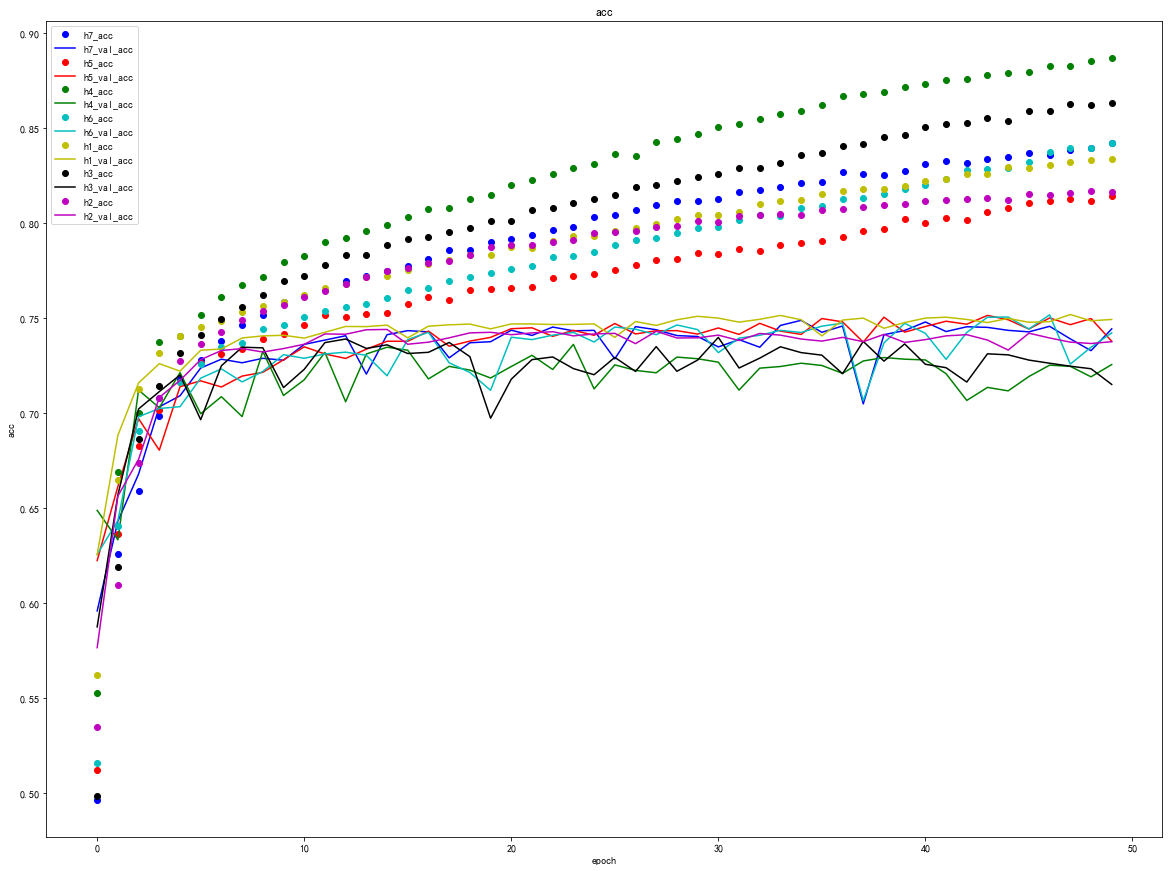

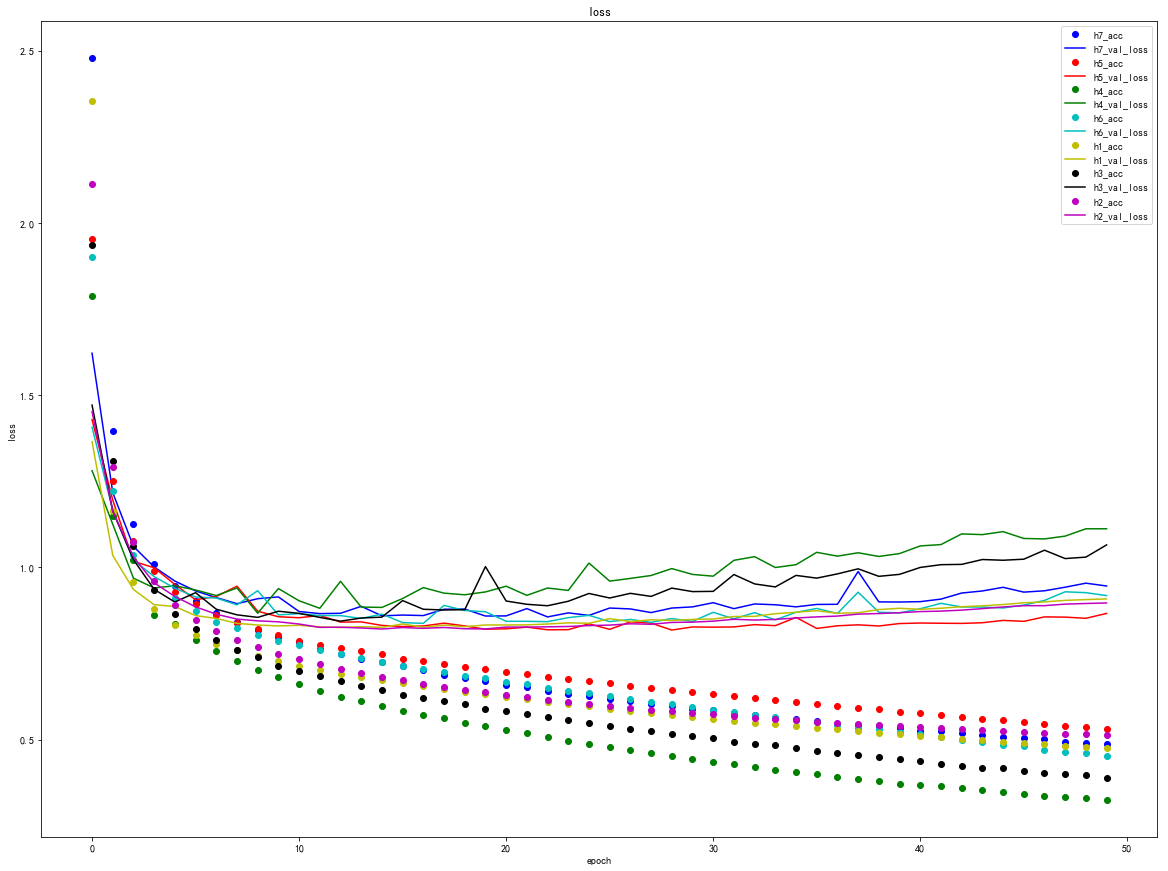

In [44]:
plot_res({"h1":hist1,"h2":hist2,"h3":hist3,"h4":hist4,"h5":hist5,"h6":hist6,"h7":hist7})

In [48]:
def get_model(i,nb_class):
    functions = [get_h1_model,get_h2_model,get_h3_model,get_h4_model,get_h5_model,get_h6_model,get_h7_model]
    return functions[i-1](nb_class)

In [49]:
hists = []
for i in range(1,8):
    model = get_model(i,len(l2_set))
    model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
    if i != 1:
        hist = model.fit(padding_input,one_hot_l2_int,batch_size=512,validation_split=0.4,epochs=epoches,verbose=0)
    else:
        hist = model.fit(one_hot_input,one_hot_l2_int,batch_size=512,validation_split=0.4,epochs=epoches,verbose=0)
    hists.append(hist)    

In [51]:
hists_dict = {}
for i,hist in enumerate(hists):
    hists_dict["h%s"%(i+1)] = hist

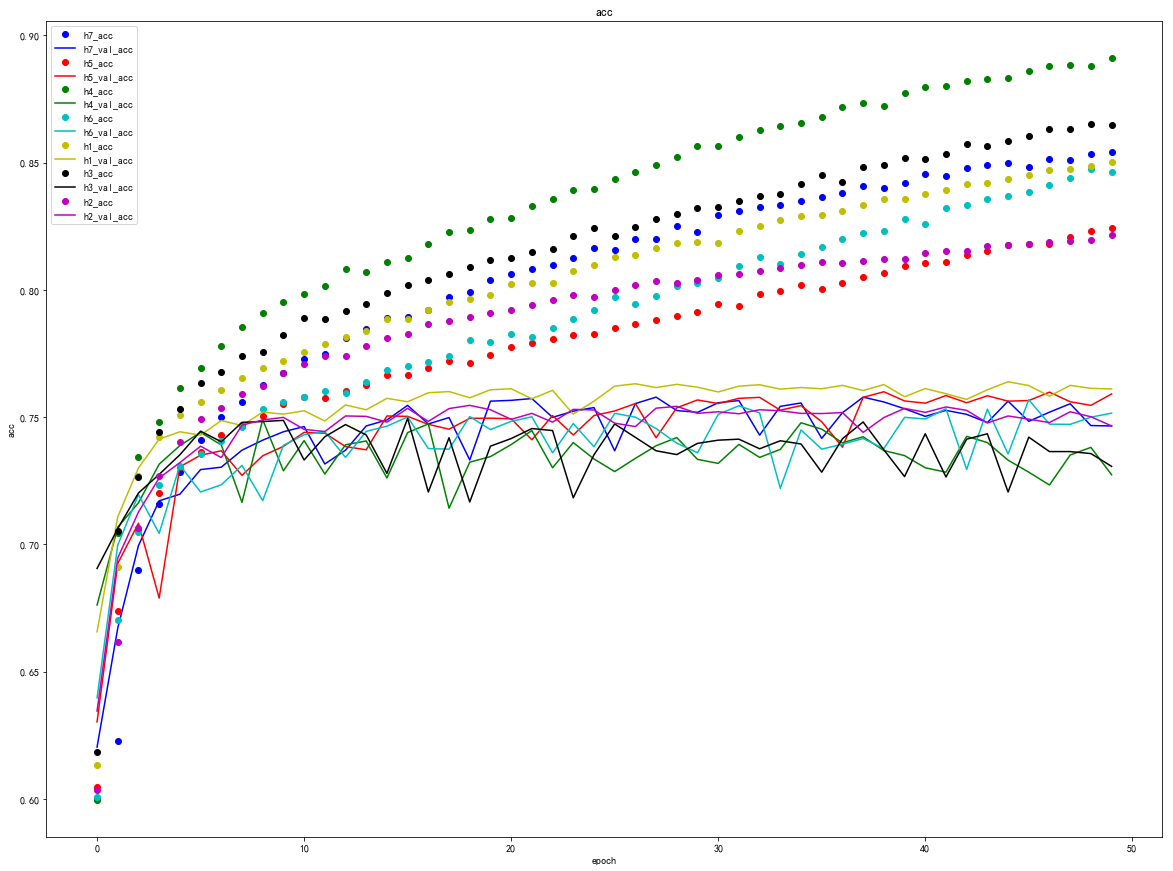

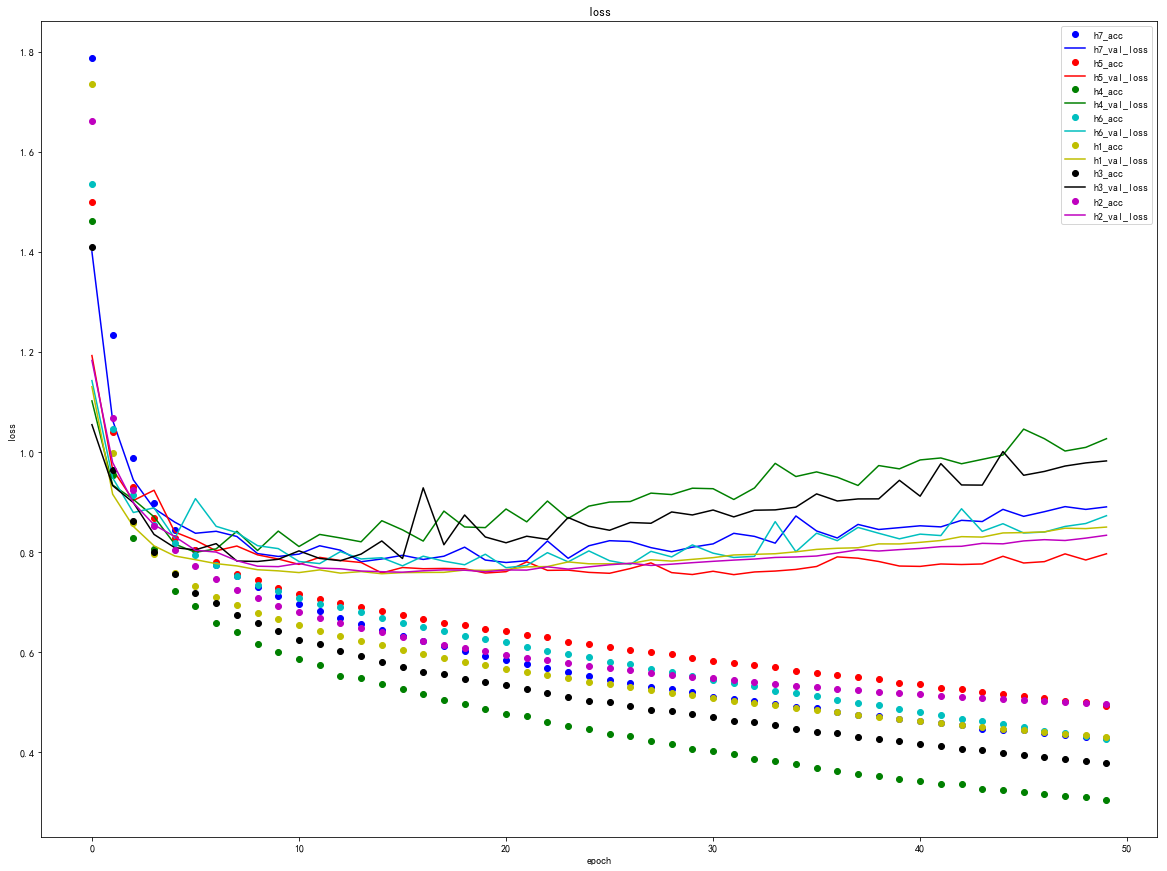

In [52]:
plot_res(hists_dict)

扩大数据

In [55]:
col_counts = []
for col_name in db.collection_names():
    col_counts.append((col_name,db.get_collection(col_name).count()))

In [57]:
col_counts.sort(key=lambda x : x[1],reverse=True)

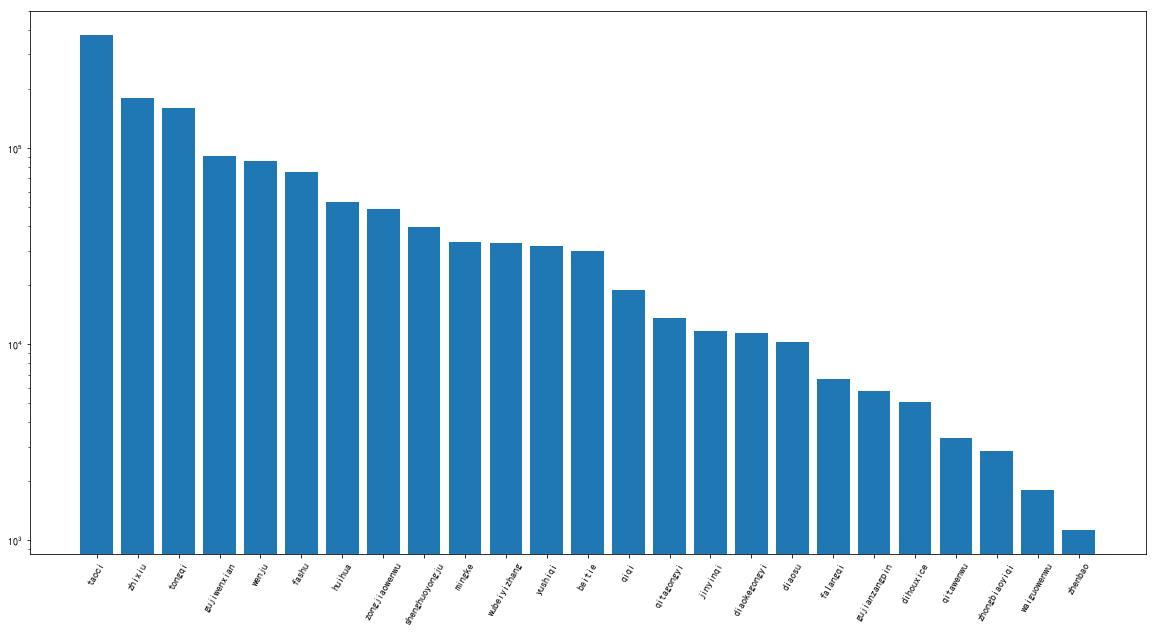

In [62]:
plt.figure(figsize=(20,10))
plt.bar(range(len(col_counts)),[x[1] for x in col_counts],log=True)
plt.xticks(range(len(col_counts)),[x[0] for x in col_counts],rotation=60)
plt.show()

In [82]:
model = get_h1_model(len(l2_set))
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['acc'])
hist = model.fit(one_hot_input,one_hot_l2_int,batch_size=512,validation_split=0.4,epochs=epoches,verbose=1)

Train on 225260 samples, validate on 150174 samples
Epoch 1/50
225260/225260 [==============================] - 28s 123us/step - loss: 0.2393 - acc: 0.9481 - val_loss: 0.1200 - val_acc: 0.9640
Epoch 2/50
225260/225260 [==============================] - 17s 73us/step - loss: 0.1076 - acc: 0.9664 - val_loss: 0.1051 - val_acc: 0.9672
Epoch 3/50
225260/225260 [==============================] - 14s 64us/step - loss: 0.0959 - acc: 0.9696 - val_loss: 0.1003 - val_acc: 0.9683
Epoch 4/50
225260/225260 [==============================] - 15s 68us/step - loss: 0.0894 - acc: 0.9715 - val_loss: 0.0954 - val_acc: 0.9702
Epoch 5/50
225260/225260 [==============================] - 15s 69us/step - loss: 0.0848 - acc: 0.9730 - val_loss: 0.0940 - val_acc: 0.9713
Epoch 6/50
225260/225260 [==============================] - 16s 72us/step - loss: 0.0812 - acc: 0.9741 - val_loss: 0.0922 - val_acc: 0.9717
Epoch 7/50
225260/225260 [==============================] - 15s 67us/step - loss: 0.0783 - acc: 0.9751 - va

KeyboardInterrupt: 

In [219]:
all = []


for col_name in db.collection_names():
    col = db.get_collection(col_name)
    for x in col.find():
        all.append([x.get("rname","none").replace("\n",""),x.get("rera","none"),col_name])

In [220]:
len(all)

1329969

In [221]:
for x in all:
    x[0] = x[0].replace("\t","")

In [222]:
era_set = ["旧石器","新石器","夏","商","周","春秋","战国","秦","汉","新莽","六朝","魏","晋","南朝","北朝","南北朝","隋","唐","五代","十国","宋","辽","金","元","明","清","民国","现代","当代","近代","待定"]

In [227]:
for x in all:
    unknown = True
    for y in era_set:
        if x[1].find(y) > -1:
            x.append(y)
            unknown = False
            break
    if unknown:
        x.append("待定")

In [271]:
for x in all:
    if x[3] in ["近代","当代","现代"]:
        x[3] = "近现代"
    if x[3] in ["南朝","北朝"]:
        x[3] = "南北朝"
    if x[3] in ["五代","十国"]:
        x[3] = "五代十国"

In [272]:
import os

In [273]:
[x for x in all if x[0].find("青花双马纹小罐")>-1]

[['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐青花双马小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明'],
 ['青花双马纹小罐', '晚明', 'taoci', '明']]

In [274]:
file = "dpm_name_era_type.txt"
if os.path.exists(os.path.join(os.getcwd(),file)):
    os.remove(os.path.join(os.getcwd(),file))
i = 0
with open(file,'w',encoding='utf8') as f:
    for x in all:
        f.write("{}\t{}\t{}\t{}\n".format(x[0],x[1],x[2],x[3]))
        i += 1
        if i%100000 == 0:
            print(i)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000


In [275]:
with open(file,'r',encoding='utf8') as f:
    data = f.readlines()
    print(data[:10])

['指南针\t现代\tqitawenwu\t近现代\n', '指南针\t现代\tqitawenwu\t近现代\n', '木尺\t现代\tqitawenwu\t近现代\n', '银盘\t现代\tqitawenwu\t近现代\n', '玻璃金鱼\t现代\tqitawenwu\t近现代\n', '玻璃金鱼\t现代\tqitawenwu\t近现代\n', '银咖啡饮具\t现代\tqitawenwu\t近现代\n', '银咖啡饮具\t现代\tqitawenwu\t近现代\n', '银咖啡饮具\t现代\tqitawenwu\t近现代\n', '银咖啡饮具\t现代\tqitawenwu\t近现代\n']


In [276]:
data = [x.rstrip().split("\t") for x in data]

In [277]:
data[:10]

[['指南针', '现代', 'qitawenwu', '近现代'],
 ['指南针', '现代', 'qitawenwu', '近现代'],
 ['木尺', '现代', 'qitawenwu', '近现代'],
 ['银盘', '现代', 'qitawenwu', '近现代'],
 ['玻璃金鱼', '现代', 'qitawenwu', '近现代'],
 ['玻璃金鱼', '现代', 'qitawenwu', '近现代'],
 ['银咖啡饮具', '现代', 'qitawenwu', '近现代'],
 ['银咖啡饮具', '现代', 'qitawenwu', '近现代'],
 ['银咖啡饮具', '现代', 'qitawenwu', '近现代'],
 ['银咖啡饮具', '现代', 'qitawenwu', '近现代']]

In [278]:
name_set = set([x[0] for x in data])

In [279]:
len(name_set)

302478

In [280]:
era_set = set([x[3] for x in data])

In [281]:
len(era_set)

25

In [282]:
era_set

{'五代十国',
 '元',
 '六朝',
 '南北朝',
 '周',
 '唐',
 '商',
 '夏',
 '宋',
 '待定',
 '战国',
 '新石器',
 '新莽',
 '明',
 '春秋',
 '晋',
 '民国',
 '汉',
 '清',
 '秦',
 '辽',
 '近现代',
 '金',
 '隋',
 '魏'}

In [283]:
era_list = ["新石器","夏","商","周","春秋","战国","秦","汉","新莽","六朝","魏","晋","南北朝","隋","唐","五代十国","宋","辽","金","元","明","清","民国","近现代","待定"]

In [284]:
era_map = {}
for i,x in enumerate(era_list):
    era_map[x] = i

In [287]:
with open(file,'a',encoding='utf8') as f:
    f.write("\n".join(["%s\t%s"%(x,y ) for x,y in era_map.items()]))

In [289]:
name_to_era_idx = []

In [290]:
for x in data:
    name_to_era_idx.append([x[0],era_map[x[3]]])

In [292]:
name_to_era_idx[:10]

[['指南针', 23],
 ['指南针', 23],
 ['木尺', 23],
 ['银盘', 23],
 ['玻璃金鱼', 23],
 ['玻璃金鱼', 23],
 ['银咖啡饮具', 23],
 ['银咖啡饮具', 23],
 ['银咖啡饮具', 23],
 ['银咖啡饮具', 23]]

In [305]:
name_to_era_list = {}

for x in name_to_era_idx:
    if name_to_era_list.get(x[0]) == None:
        name_to_era_list[x[0]] = [0]*len(era_set)
    name_to_era_list[x[0]][x[1]] += 1    

In [309]:
name2era_list = zip(name_to_era_list.keys(),name_to_era_list.values())

In [312]:
name2era_list = list(name2era_list)

In [313]:
name2era_list[:3]

[('檀香木交龙纽“翊佑传昌”章',
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]),
 ('顾囗基致质山札',
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 ('福长安画山水吴省兰书御制诗成扇',
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])]

In [314]:
import pickle

In [315]:
file = "name2era_list"

In [317]:
pickle.dump?

In [320]:
with open(file,'wb') as f:
    pickle.dump({"era_map":era_map,"name2era_list":name2era_list},f)

In [321]:
with open(file,'rb') as f:
    d = pickle.load(f)
    em = d["era_map"]
    ne = d["name2era_list"]
    print(em)
    print(ne[:3])

{'五代十国': 15, '商': 2, '战国': 5, '近现代': 23, '待定': 24, '辽': 17, '晋': 11, '新石器': 0, '秦': 6, '周': 3, '金': 18, '唐': 14, '六朝': 9, '清': 21, '明': 20, '春秋': 4, '汉': 7, '新莽': 8, '元': 19, '夏': 1, '宋': 16, '民国': 22, '隋': 13, '南北朝': 12, '魏': 10}
[('檀香木交龙纽“翊佑传昌”章', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]), ('顾囗基致质山札', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), ('福长安画山水吴省兰书御制诗成扇', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])]


In [322]:
len(name_to_era_list)

302478

In [328]:
name2era_list[:3]

[('檀香木交龙纽“翊佑传昌”章',
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]),
 ('顾囗基致质山札',
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 ('福长安画山水吴省兰书御制诗成扇',
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])]

In [ ]:
import keras